<a href="https://colab.research.google.com/github/awadell1/MLOnAGooseberryBush/blob/master/src/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
#import tensorflow.compat.v1 as tf
from tqdm.notebook import tqdm
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Activation, Dense, Dot, Embedding, Flatten, GlobalAveragePooling1D, Reshape
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.backend import placeholder
from tensorflow import keras
from tensorflow.keras import layers

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_df=pd.read_csv('/content/drive/My Drive/24787 Group Project  /Data/X_data.csv')
I2W_df=pd.read_csv('/content/drive/My Drive/24787 Group Project  /Data/Dictionary_HG.csv')
W2I_df=I2W_df.reset_index().set_index('Vocab')

In [ ]:
W2I_df

,index
Vocab,
<pad>,0
ripping,1
seeps,2
chap,3
1996's,4
...,...
kenwood,37545
hotel,37546
miserly,37547


In [ ]:
X_df
'i want an apple and a cup of coffee'

,Target,Context,Negative Sample,Negative Sample 1,Negative Sample 2,Negative Sample 3,Negative Sample 4
0,37275,2500,[15 17 2 0],15,17,2,0
1,29789,37275,[10206 24691 8 796],10206,24691,8,796
2,29789,2500,[ 1 9 703 31174],1,9,703,31174
3,32214,2500,[ 103 1610 1730 4295],103,1610,1730,4295
4,33304,37275,[4492 207 13 14],4492,207,13,14
...,...,...,...,...,...,...,...
27715017,20217,30134,[ 2 24582 52 2201],2,24582,52,2201
27715018,8471,1643,[ 0 9 17 10252],0,9,17,10252
27715019,1643,30134,[22623 3 7611 0],22623,3,7611,0
27715020,1643,8471,[ 46 2219 8869 1059],46,2219,8869,1059


In [ ]:
tf.compat.v1.disable_eager_execution()
test = X_df[0:20480]

In [ ]:
def dict_builder(general_dataframe,dict_dataframe):
    new_dict={}
    ind=np.array(general_dataframe.index)
    counter = 0
    for i in ind:
        word_num1=general_dataframe['Target'][i]
        word1=dict_dataframe['Vocab'][word_num1]
        word_num2=general_dataframe['Context'][i]
        word2=dict_dataframe['Vocab'][word_num2]
        if np.all(word1 != np.array(list(new_dict.values()))):
            new_dict[counter]=word1
            counter = counter+1
        if np.all(word2 != np.array(list(new_dict.values()))):
            new_dict[counter]=word2
            counter = counter+1
    return new_dict

In [ ]:
dict_word=dict_builder(test,I2W_df)
word_dict_int = {v: k for k, v in dict_word.items()}

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
ONE_HOT_DIM = len(dict_word)
print(ONE_HOT_DIM)
# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word 

for x, y in tqdm(zip(test['Target'], test['Context'])):
    target=I2W_df['Vocab'][x]
    context=I2W_df['Vocab'][y]
    X.append(to_one_hot_encoding(word_dict_int[target]))
    Y.append(to_one_hot_encoding(word_dict_int[context]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

1044


In [ ]:
# Define a simple sequential model
def create_model(EMBEDDING_DIM = 128, ONE_HOT_DIM = 1044, optimizer='adam'):
  model = tf.keras.models.Sequential([
    keras.layers.Dense(EMBEDDING_DIM, activation="relu", input_shape=(ONE_HOT_DIM,)),
    keras.layers.Dense(ONE_HOT_DIM,activation=tf.nn.softmax)
  ])

  model.compile(optimizer=tf.keras.optimizers.Nadam(),
                loss=tf.losses.CategoricalCrossentropy(from_logits=True),
                metrics=["accuracy"])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()


# inputs = keras.Input(ONE_HOT_DIM)
# EMBEDDING_DIM = 25
# x = layers.Dense(EMBEDDING_DIM, activation="relu")(inputs)
# outputs = layers.Dense(ONE_HOT_DIM,activation=tf.nn.softmax)(x)
# model2 = keras.Model(inputs=inputs, outputs=outputs)



# # making placeholders for X_train and Y_train
# x = tf.compat.v1.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
# y_label = tf.compat.v1.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# # word embedding will be 2 dimension for 2d visualization


# # hidden layer: which represents word vector eventually
# W1 = tf.Variable(tf.compat.v1.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
# b1 = tf.Variable(tf.compat.v1.random_normal([1])) #bias
# hidden_layer = tf.add(tf.matmul(x,W1), b1)

# # output layer
# W2 = tf.Variable(tf.compat.v1.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
# b2 = tf.Variable(tf.compat.v1.random_normal([1]))
# prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# # loss function: cross entropy
# loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.compat.v1.log(prediction), axis=[1]))

# # training operation
# train_op = tf.compat.v1.train.GradientDescentOptimizer(
#     learning_rate=0.001).minimize(loss)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                33440     
_________________________________________________________________
dense_11 (Dense)             (None, 1044)              34452     
Total params: 67,892
Trainable params: 67,892
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import os

In [ ]:
checkpoint_path = "/content/drive/My Drive/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Loads the weights
#model.load_weights(checkpoint_path)

# Re-evaluate the model
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)
# Train the model with the new callback
model.fit(X_train, 
          Y_train,  
          batch_size=1024, epochs=1000, verbose=2)
          #callbacks=[cp_callback])  # Pass callback to training

Train on 20480 samples
Epoch 1/1000
20480/20480 - 0s - loss: 6.8366 - accuracy: 0.1159
Epoch 2/1000
20480/20480 - 0s - loss: 6.8366 - accuracy: 0.1159
Epoch 3/1000
20480/20480 - 0s - loss: 6.8366 - accuracy: 0.1159
Epoch 4/1000
20480/20480 - 0s - loss: 6.8366 - accuracy: 0.1159
Epoch 5/1000
20480/20480 - 0s - loss: 6.8366 - accuracy: 0.1159
Epoch 6/1000
20480/20480 - 0s - loss: 6.8366 - accuracy: 0.1159
Epoch 7/1000
20480/20480 - 0s - loss: 6.8366 - accuracy: 0.1159
Epoch 8/1000
20480/20480 - 0s - loss: 6.8366 - accuracy: 0.1159
Epoch 9/1000
20480/20480 - 0s - loss: 6.8366 - accuracy: 0.1159
Epoch 10/1000
20480/20480 - 0s - loss: 6.8366 - accuracy: 0.1159
Epoch 11/1000
20480/20480 - 0s - loss: 6.8366 - accuracy: 0.1159
Epoch 12/1000
20480/20480 - 0s - loss: 6.8366 - accuracy: 0.1159
Epoch 13/1000
20480/20480 - 0s - loss: 6.8366 - accuracy: 0.1159
Epoch 14/1000
20480/20480 - 0s - loss: 6.8366 - accuracy: 0.1159
Epoch 15/1000
20480/20480 - 0s - loss: 6.8366 - accuracy: 0.1159
Epoch 16/10

KeyboardInterrupt: ignored

In [ ]:
!ls {checkpoint_dir}

ls: cannot access '/content/drive/My': No such file or directory
ls: cannot access 'Drive/training_1': No such file or directory


In [ ]:
model2.load_weights("/content/drive/My Drive/saved_model/")
model2.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)
model2.fit(X_train, Y_train, batch_size=10, epochs=10, verbose=1)
#model2.evaluate(x_test, y_test, batch_size=32, verbose=2)
# model.save_weights('checkpoint_folder/')
model2.save("/content/drive/My Drive/saved_model")

# #tf.compat.v1.reset_default_graph()
# sess = tf.compat.v1.Session()
# init = tf.compat.v1.global_variables_initializer()
# sess.run(init) 

# # Add ops to save and restore all the variables.
# saver = tf.compat.v1.train.Saver()

# iteration = 350000
# for i in tqdm(range(iteration)):
#     # input is X_train which is one hot encoded word
#     # label is Y_train which is one hot encoded neighbor word
#     sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
#     if i % 3500 == 0:
#         print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))
#           # Save the variables to disk.
#         save_path = saver.save(sess, "/content/drive/My Drive/24787 Group Project  /model_naive_skip_gram.ckpt")
#         if ~np.isnan(sess.run(loss, feed_dict={x: X_train, y_label: Y_train})):
#             vectors = sess.run(W1 + b1)
#             w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25'])
#             w2v_df['word'] = np.array(list(dict_word.values()))
#             w2v_df = w2v_df[['word', 'x1', 'x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25']]
#             w2v_df.to_csv('/content/drive/My Drive/24787 Group Project  /Data/trained_coefficient_w2v.csv',index=False)
#         #print("Model saved in path: %s" % save_path)

NotFoundError: ignored

In [ ]:
loss= float('nan')
import math
print(np.isnan(loss))

True


In [ ]:
#@tf.function
def generating_training_sample(dataframe,num_ns):
    num_sample=dataframe.shape[0]
    # Elements of each training example are appended to these lists.
    targets, contexts, labels = [], [], []
    
    for i in tqdm(range(num_sample)):
        negative_sampling_candidates=dataframe[['Negative Sample 1', 'Negative Sample 2', 'Negative Sample 3', 'Negative Sample 4']].iloc[[i]].to_numpy()
        context_class=X_df[['Context']].iloc[[i]].to_numpy()
        target_word=X_df[['Target']].iloc[[i]].to_numpy()
        num_ns=4
        #tf.convert_to_tensor(value, dtype=None, dtype_hint=None, name=None)
        negative_sampling_candidates = tf.reshape(tf.constant(negative_sampling_candidates, dtype="int64"), (num_ns,))
        context_class = tf.reshape(tf.constant(context_class, dtype="int64"), (1, 1))
        target_word = tf.reshape(tf.constant(target_word, dtype="int64"), (1, 1))
        # Add a dimension so you can use concatenation (on the next step).
        negative_sampling_candidates = tf.expand_dims(negative_sampling_candidates, 1)
        # Concat positive context word with negative sampled words.
        context = tf.concat([context_class, negative_sampling_candidates], 0)
        # Label first context word as 1 (positive) followed by num_ns 0s (negative).
        label = tf.constant([1] + [0]*num_ns, dtype="int64") 
        # Reshape target to shape (1,) and context and label to (num_ns+1,).
        target = tf.squeeze(target_word)
        context = tf.squeeze(context)
        label =  tf.squeeze(label)
        targets.append(target)
        contexts.append(context)
        labels.append(label)
    return targets, contexts, labels

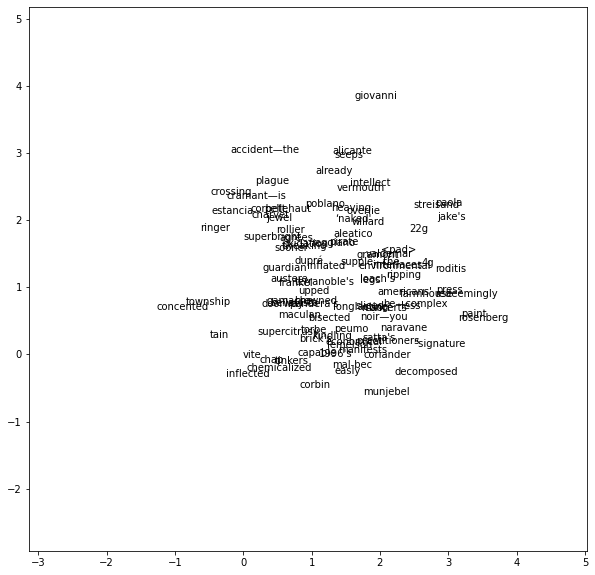

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'][0:1000], w2v_df['x1'][0:1000], w2v_df['x2'][0:100]):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 0.1
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:
targets, contexts, labels=generating_training_sample(X_df[0:10240],4)

In [ ]:
contexts.

AttributeError: ignored

In [ ]:
BATCH_SIZE = 1024
BUFFER_SIZE = 10000
dataset = tf.data.Dataset.from_tensor_slices(((targets, contexts), labels))
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
print(dataset)

<BatchDataset shapes: (((1024,), (1024, 5)), (1024, 5)), types: ((tf.int64, tf.int64), tf.int64)>


In [ ]:
num_ns=4

In [ ]:
dataset = dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
print(dataset)

<PrefetchDataset shapes: (((1024,), (1024, 5)), (1024, 5)), types: ((tf.int64, tf.int64), tf.int64)>


In [ ]:
class Word2Vec(Model):
  def __init__(self, vocab_size, embedding_dim):
    super(Word2Vec, self).__init__()
    self.target_embedding = Embedding(vocab_size, 
                                      embedding_dim,
                                      input_length=1,
                                      name="w2v_embedding", )
    self.context_embedding = Embedding(vocab_size, 
                                       embedding_dim, 
                                       input_length=num_ns+1)
    self.dots = Dot(axes=(3,2))
    self.flatten = Flatten()

  def call(self, pair):
    target, context = pair
    we = self.target_embedding(target)
    ce = self.context_embedding(context)
    dots = self.dots([ce, we])
    return self.flatten(dots)

In [ ]:
def custom_loss(x_logit, y_true):
      return tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=y_true)

In [ ]:
embedding_dim = 128
word2vec = Word2Vec(W2I_df.shape[0], embedding_dim)
word2vec.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [ ]:
word2vec.fit(dataset, epochs=20, callbacks=[tensorboard_callback])
%tensorboard --logdir logs

Epoch 1/20


StagingError: ignored